In [1]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import arff
import pandas as pd

# Air pollution in Seoul

In [5]:
path = 'Measurement_info.csv'
dates = []
pollution = []

with open(path, 'r') as file:
    reader = csv.reader(file)
    next(reader,None)

    for line in reader:
      if(line[1] == '101' and line[2] =='3'):
        dates.append(datetime.strptime(line[0], '%Y-%m-%d %H:%M'))
        pollution.append(float(line[3]))

pollution = np.array(pollution)


In [6]:
meanafter = np.mean(pollution[pollution != -1])
for i in range(len(pollution)):
  if(pollution[i] == -1.0):
    pollution[i] = meanafter

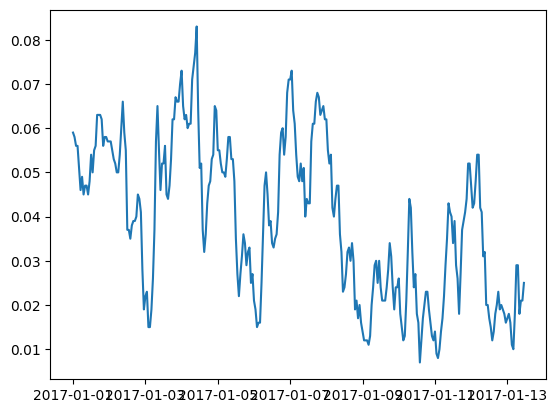

In [7]:
plt.plot(dates[0:300],pollution[0:300])
plt.show()

# ECG 1

In [2]:

# Load ARFF file
data, meta = arff.loadarff('ECG5000_TRAIN.arff')

# Convert to DataFrame
df = pd.DataFrame(data)


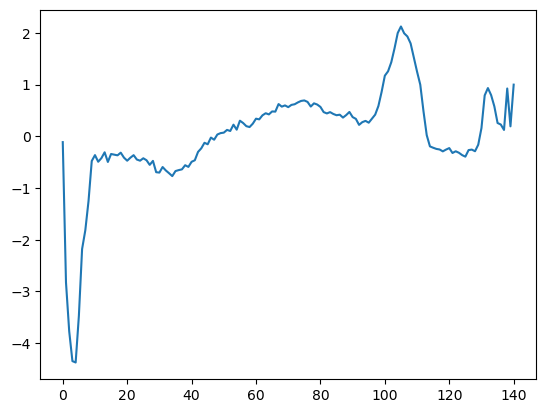

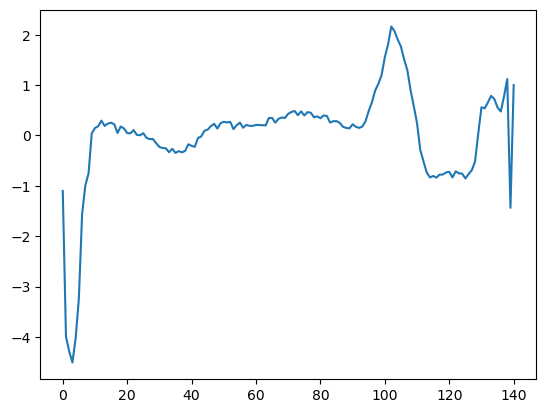

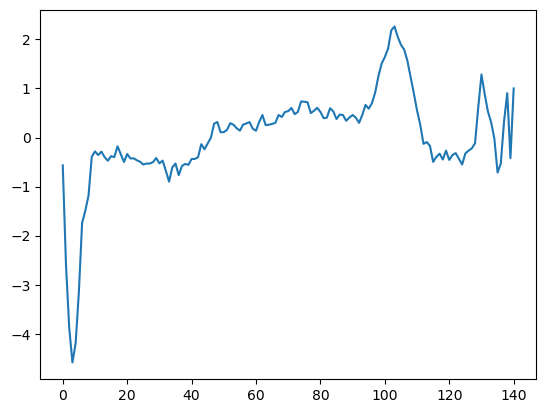

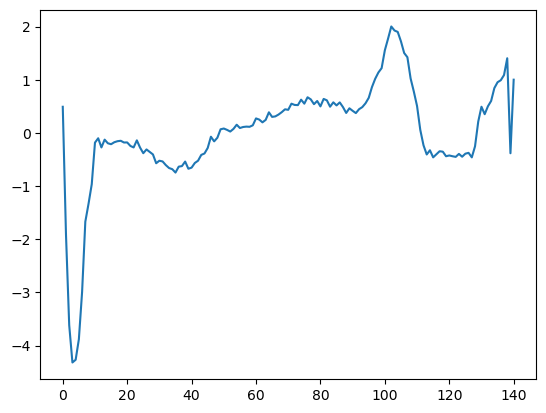

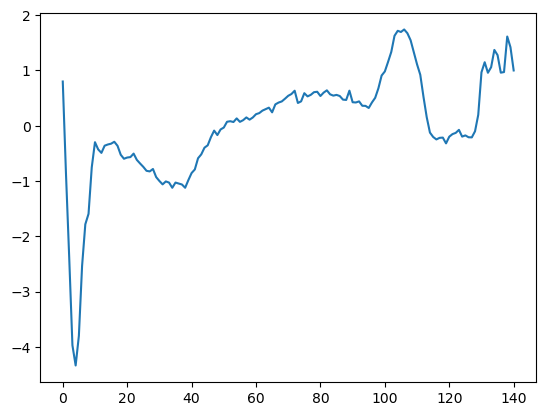

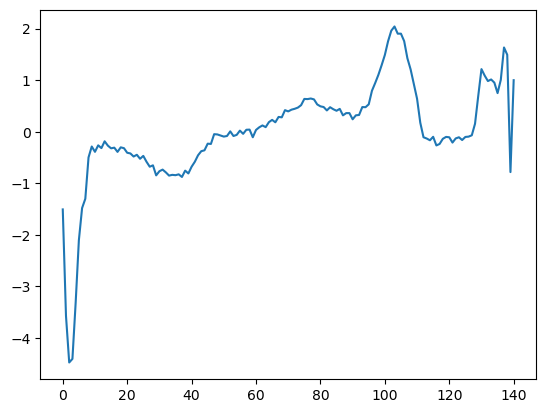

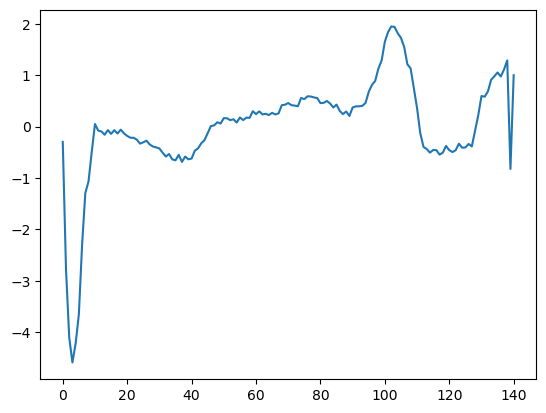

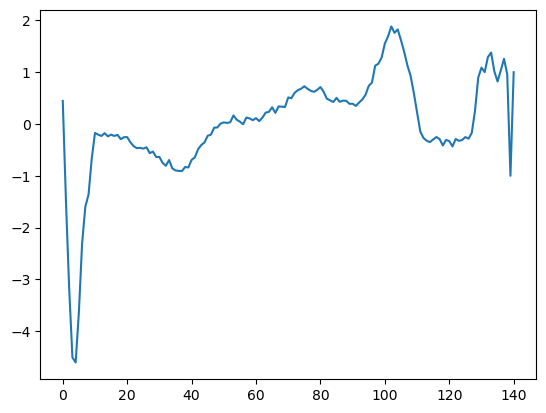

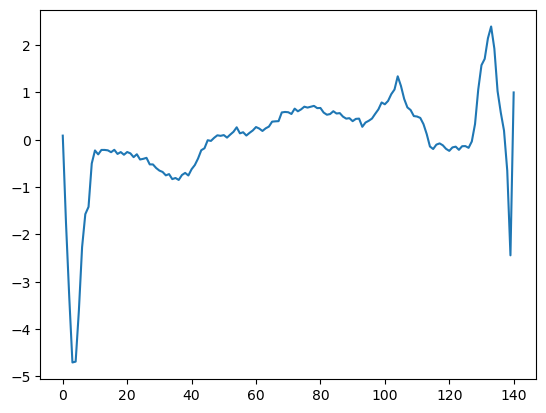

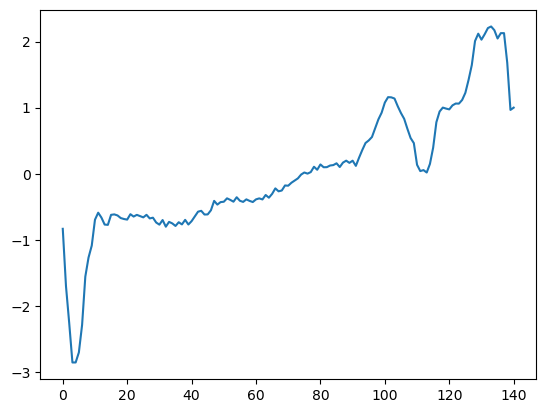

In [7]:
i = 100

for i in range(10):
    line = df.iloc[i]

    line = line.astype(float).tolist()

    plt.plot([i for i in range(len(line))],line)
    plt.show()

# ECG 2

In [12]:
path = 'mitbih_train.csv'
ECG = []

with open(path, 'r') as file:
    reader = csv.reader(file)
    next(reader,None)

    for line in reader:
      new = []
      for i in range(len(line)):
        new.append(float(line[i]))
      ECG.append(new)




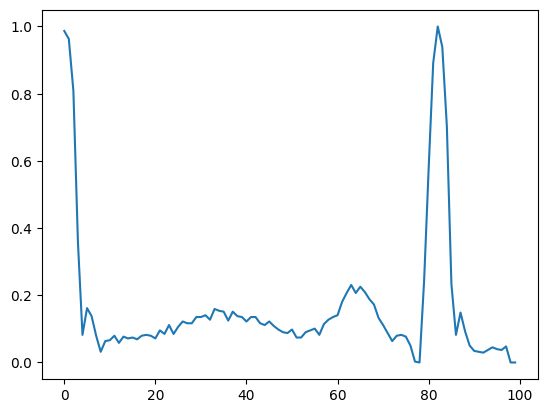

In [13]:
i = 11
ECG[11] = ECG[11][:100]
plt.plot([i for i in range(len(ECG[i]))],ECG[i])
plt.show()